In [ ]:
from ultralytics import YOLO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from Attacked_Model import Attacked_YOLO
from tog_vanishing import tog_vanishing
from utills import letterbox_image_padded, preprocess
import numpy as np
from PIL import Image
%matplotlib inline

data = ["F:/Programming/Github Repository/TOG-Vanishing-Attacks-on-YOLO11/Data/bus.jpg", #bus image
        "F:/Programming/Github Repository/TOG-Vanishing-Attacks-on-YOLO11/Data/000000000036.jpg", #coco8 images
        "F:/Programming/Github Repository/TOG-Vanishing-Attacks-on-YOLO11/Data/000000000042.jpg",
        "F:/Programming/Github Repository/TOG-Vanishing-Attacks-on-YOLO11/Data/000000000049.jpg",
        "F:/Programming/Github Repository/TOG-Vanishing-Attacks-on-YOLO11/Data/000000000061.jpg"] 

def attack_demo(reshaped_imgs, attacked_imgs, etas):
    """
    Demo for two base models. 

    Args:
            reshaped_imgs (List(pil.Image)): List of resized images. w, h = 640, 640
            attacked_imgs (List(torch.Tensor)): List of images with TOG-Vanishing noise
            etas (List(torch.Tensor)): List of TOG-Vanishing noises
    """
    model_1 = YOLO("yolo11n.pt")
    model_2 = YOLO("yolo11n.pt")
    
    fig, axs = plt.subplots(figsize=(20, 20), ncols=len(etas), nrows=5)
    for i in range(len(etas)):
        results_1 = model_1.predict(reshaped_imgs[i], imgsz=(640, 640))  # predict on a normal image
        results_2 = model_2.predict(attacked_imgs[i], imgsz=(640, 640))  # predict on an attacked image
        
        test_image_1 = results_1[0].plot(line_width=2)
        test_image_2 = results_2[0].plot(line_width=2)

        attacked_img = np.array(attacked_imgs[i]) #preprocessing attacked image torch.tensor for correct plotting
        attacked_img = attacked_img[..., ::].transpose((0, 2, 3, 1))

        norm_eta = np.array(etas[i]) #preprocessing noise torch.tensor for correct plotting
        norm_eta = norm_eta[..., ::-1].transpose(0, 2, 3, 1)

        axs[0, i].set_title("Normal Image")
        axs[0, i].imshow(reshaped_imgs[i])
        axs[0, i].axis('off')
        axs[1, i].imshow((norm_eta[0] - norm_eta[0].min()) / (norm_eta[0].max() - norm_eta[0].min()))
        axs[1, i].set_title("Trained TOG-Vanishing eta")
        axs[1, i].axis('off')
        axs[2, i].imshow(attacked_img[0])
        axs[2, i].set_title("Attacked Image")
        axs[2, i].axis('off')
        axs[3, i].imshow(test_image_1)
        axs[3, i].set_title("Normal Image Detection")
        axs[3, i].axis('off')
        axs[4, i].imshow(test_image_2)
        axs[4, i].set_title("Attacked Image Detection")
        axs[4, i].axis('off')
    plt.show()


def attack_demo_2(data):
    """
    Demo for base model and modified model. 

    Args:
            data (List(string)): Array of paths to images for demo
    """
    model_1 = YOLO("yolo11n.pt") #base model
    model_2 = Attacked_YOLO("yolo11n.pt") #modified model

    fig, axs = plt.subplots(figsize=(15, 15), nrows=3, ncols=len(data))
    for i in range(len(data)):
        pil_image = Image.open(data[i])
        results_1 = model_1.predict(data[i], imgsz=(640, 640))  # predict using base model
        results_2 = model_2.predict(data[i], imgsz=(640, 640))  # predict using modified model
        
        test_image_1 = results_1[0].plot(line_width=2)
        test_image_2 = results_2[0].plot(line_width=2)

        axs[0, i].imshow(pil_image)
        axs[0, i].set_title("Normal Image")
        axs[0, i].axis('off')
        axs[1, i].imshow(test_image_1)
        axs[1, i].set_title("Normal Image Detection")
        axs[1, i].axis('off')
        axs[2, i].imshow(test_image_2)
        axs[2, i].set_title("TOG Vanishing Attack")
        axs[2, i].axis('off')
    plt.show()


def vanishing_attack(data):
    """
    TOG-Vanishing Attack

    Args:
            data (torch.tensor): Input image tensor

    Output:
            tuple(
            torch.tensor: image with noise
            torch.tensor: TOG-Vanishing nois
            )
    """
    reshaped_images = []
    etas = []
    x_attacked = []

    for i in range(len(data)):
        pil_image = Image.open(data[i])
        new_image = letterbox_image_padded(pil_image)
        reshaped_images.append(new_image)
        torch_tensor = preprocess(new_image)
        new_x_attacked, new_eta = tog_vanishing(torch_tensor)
        x_attacked.append(new_x_attacked)
        etas.append(new_eta)
    return reshaped_images, x_attacked, etas


def show_noise(eta):
    norm_eta = np.array(eta)
    norm_eta = norm_eta[..., ::-1].transpose(0, 2, 3, 1)
    plt.clf()
    plt.title('Trained TOG-universal: eta')
    plt.imshow((norm_eta[0] - norm_eta[0].min()) / (norm_eta[0].max() - norm_eta[0].min()))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [15]:
reshaped_images, x_attacked, etas = vanishing_attack(data)

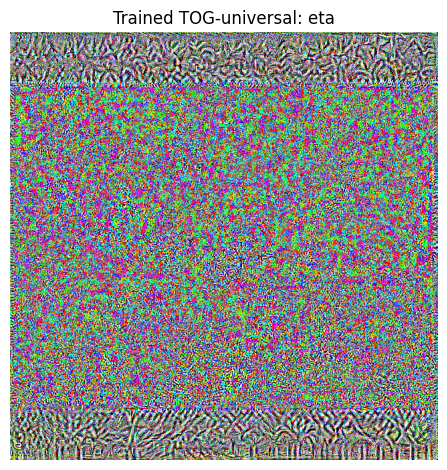

In [16]:
id = 4
show_noise(etas[id])


0: 640x640 4 persons, 1 bus, 7.5ms
Speed: 2.0ms preprocess, 7.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 1 umbrella, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 dog, 1 suitcase, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 2 horses, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.0ms
Speed: 1.0ms preprocess, 7.0ms

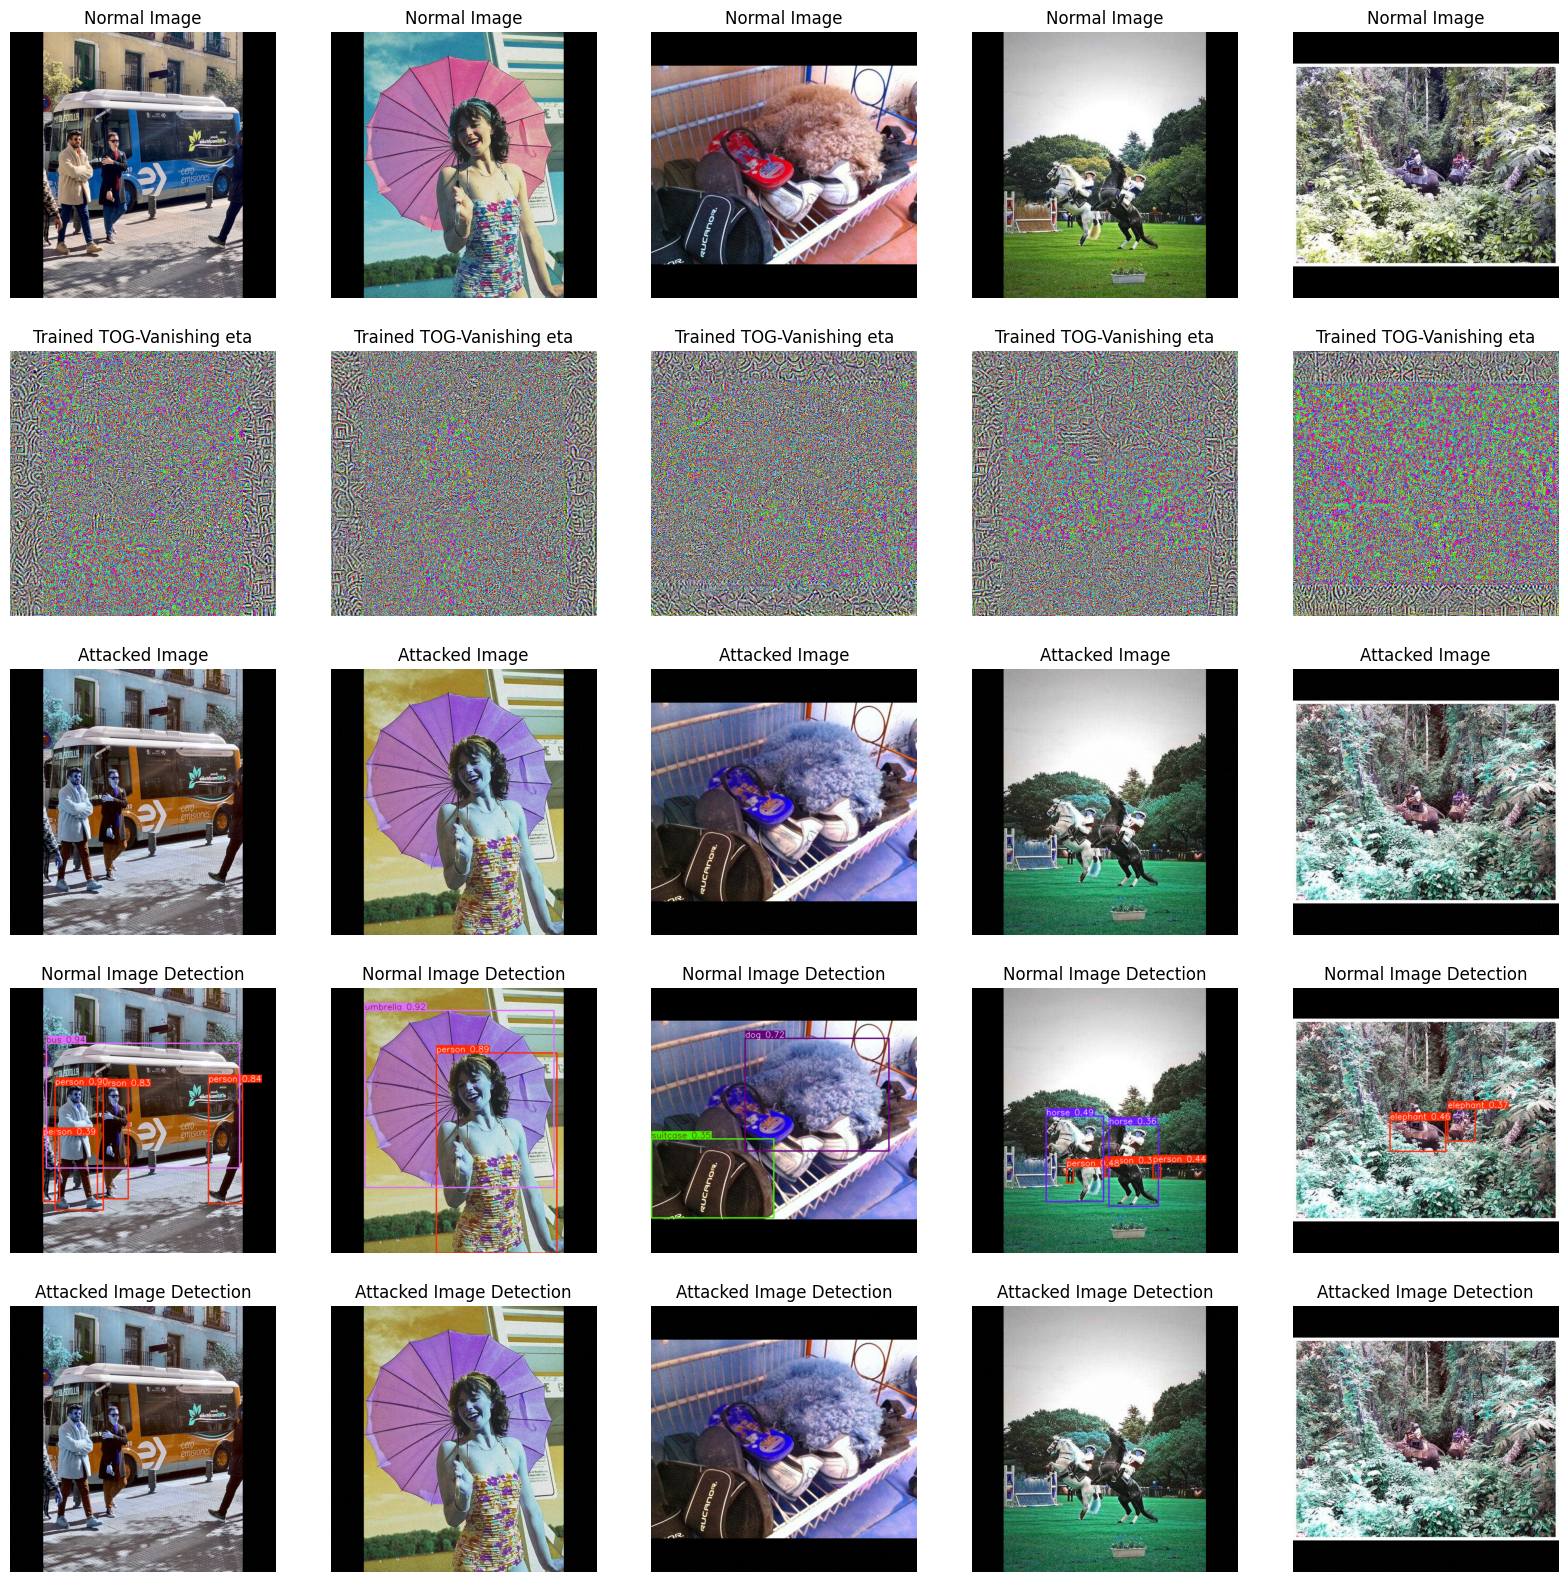

In [25]:
attack_demo(reshaped_images, x_attacked, etas)


image 1/1 F:\ML\Samsung\Attacks\bus.jpg: 640x480 4 persons, 1 bus, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 F:\ML\Samsung\Attacks\bus.jpg: 640x480 (no detections), 19.0ms
Speed: 2467.6ms preprocess, 19.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 F:\ML\Samsung\Attacks\datasets\coco8\images\val\000000000036.jpg: 640x512 1 person, 1 umbrella, 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 F:\ML\Samsung\Attacks\datasets\coco8\images\val\000000000036.jpg: 640x512 (no detections), 23.5ms
Speed: 2469.9ms preprocess, 23.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 F:\ML\Samsung\Attacks\datasets\coco8\images\val\000000000042.jpg: 480x640 1 dog, 1 suitcase, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 F:\ML\Samsung\A

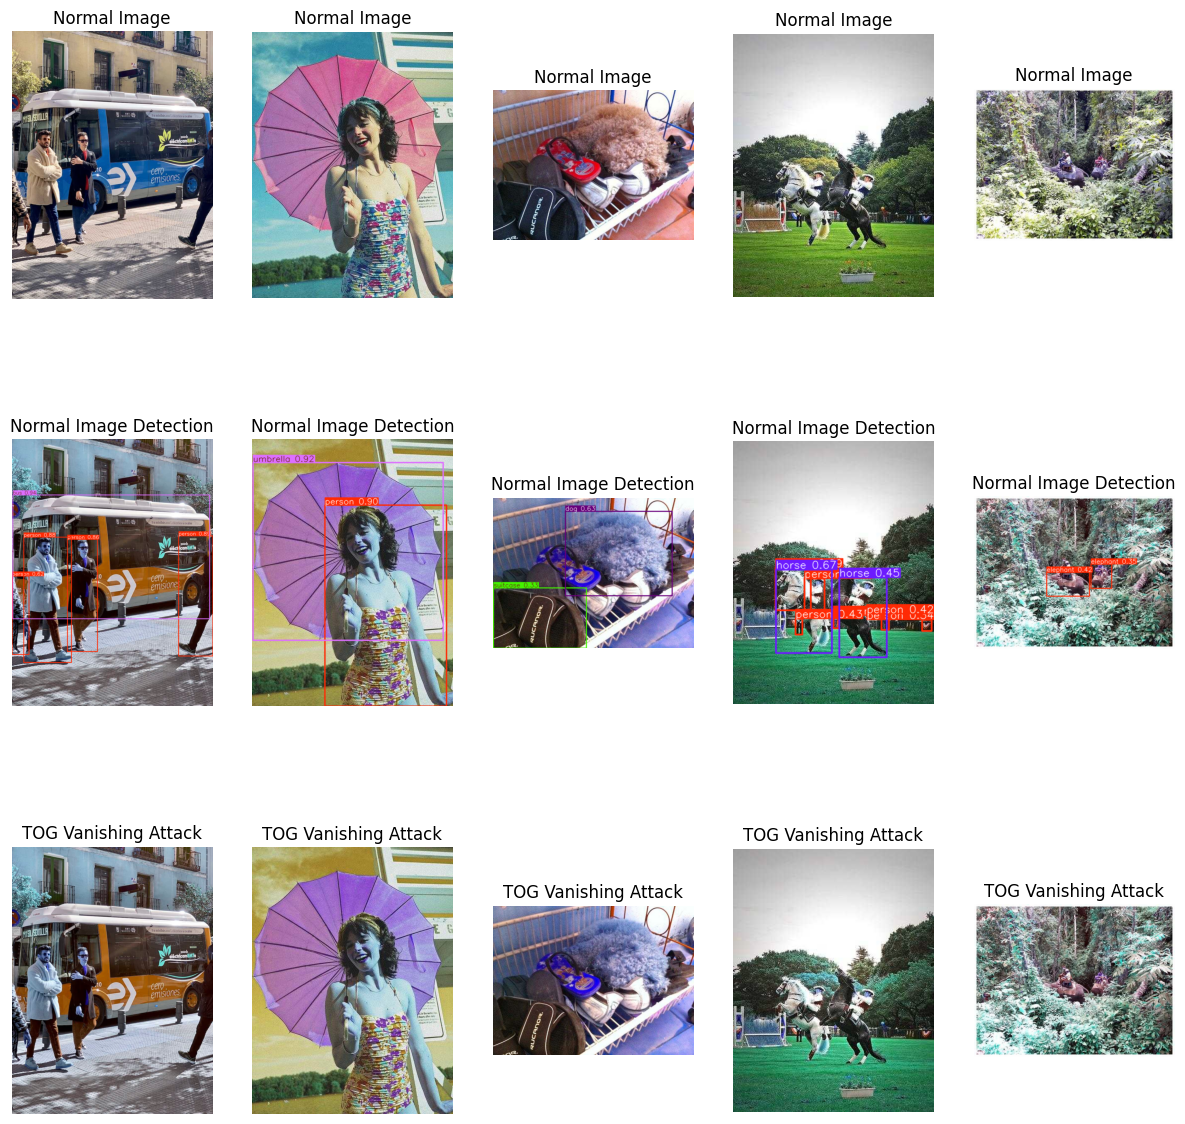

In [19]:
attack_demo_2(data)

In [5]:
broken_model = Attacked_YOLO("yolo11n.pt")
metrics = broken_model.val(data='coco.yaml', imgsz=640)  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics 8.3.23  Python-3.12.7 torch-2.5.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16379MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

Dataset 'coco.yaml' images not found , missing path 'F:\ML\Samsung\Attacks\datasets\coco\val2017.txt'


100%|██████████| 169M/169M [00:44<00:00, 4.00MB/s] 
Unzipping F:\ML\Samsung\Attacks\datasets\coco2017labels-segments.zip to F:\ML\Samsung\Attacks\datasets\coco...: 100%|██████████| 122232/122232 [01:07<00:00, 1824.22file/s]

Dataset download success  (10780.1s), saved to F:\ML\Samsung\Attacks\datasets



val: Scanning F:\ML\Samsung\Attacks\datasets\coco\labels\val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [01:08<00:00, 72.83it/s] 


val: New cache created: F:\ML\Samsung\Attacks\datasets\coco\labels\val2017.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [3:14:07<00:00, 37.21s/it]  


                   all       5000      36335     0.0393      0.108     0.0408     0.0222
                person       2693      10777      0.109       0.31      0.142      0.066
               bicycle        149        314     0.0241     0.0828     0.0245    0.00902
                   car        535       1918     0.0936      0.112      0.075     0.0393
            motorcycle        159        367     0.0669      0.161     0.0645     0.0318
              airplane         97        143     0.0324      0.161     0.0408     0.0187
                   bus        189        283      0.112      0.138      0.106     0.0564
                 train        157        190     0.0562      0.263     0.0898      0.042
                 truck        250        414      0.035      0.155     0.0281     0.0134
                  boat        121        424     0.0192      0.033     0.0136    0.00595
         traffic light        191        634     0.0363     0.0489     0.0264     0.0125
          fire hydran

array([   0.065975,   0.0090245,    0.039312,    0.031807,    0.018714,    0.056412,    0.041957,    0.013412,   0.0059501,    0.012541,    0.020044,    0.059686,    0.002069,   0.0071394,   0.0039932,     0.02482,    0.030719,    0.046126,    0.024044,    0.029039,    0.021183,    0.022847,     0.10892,    0.090954,
         0.0040299,     0.01448,   0.0042224,   0.0095152,   0.0079847,    0.039026,   0.0085682,   0.0041204,    0.062723,   0.0080682,    0.010577,    0.025652,    0.014028,    0.021312,    0.026041,   0.0054759,    0.021289,    0.020121,    0.025225,   0.0043592,   0.0068388,    0.027766,     0.01735,   0.0048638,
           0.01513,    0.015825,   0.0054437,   0.0040187,    0.013329,    0.078028,     0.03951,   0.0046222,   0.0086573,    0.012584,    0.005871,    0.021914,    0.032216,    0.014815,      0.0226,      0.0576,    0.052616,   0.0068297,    0.059148,    0.014842,    0.027986,    0.028951,           0,    0.007378,
          0.012059,   0.0042175,    0.02160

In [11]:
model = Attacked_YOLO()
metrics = model.val(data='coco8.yaml', imgsz=640)  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics 8.3.23  Python-3.12.7 torch-2.5.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16379MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


val: Scanning F:\ML\Samsung\Attacks\datasets\coco8\labels\val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:16<00:00, 16.53s/it]


                   all          4         17       0.25        0.1      0.171     0.0433
                person          3         10        0.5        0.1      0.275       0.11
                   dog          1          1          0          0          0          0
                 horse          1          2          1        0.5       0.75       0.15
              elephant          1          2          0          0          0          0
              umbrella          1          1          0          0          0          0
          potted plant          1          1          0          0          0          0
Speed: 3369.7ms preprocess, 22.3ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\detect\val2


array([       0.11,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,           0,        0.15,    0.043333,    0.043333,           0,    0.043333,    0.043333,    0.043333,
          0.043333,           0,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,
          0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,           0,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,    0.043333,
          0.043333,    0.043333,    0.04333